In [1]:
# Tratamiento de datos
# ==============================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In C:\Users\naata\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naata\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naata\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\naata\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naata\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
Stress_enr = pd.read_csv('C:\\Users\\naata\\Documents\\MASTER\\TFM\\GSEA_Stress_res_all_gs.csv')
HDAC_enr = pd.read_csv('C:\\Users\\naata\\Documents\\MASTER\\TFM\\GSEA_HDACi_res_all_gs.csv')

In [28]:
gsva_res = pd.read_csv('C:\\Users\\naata\\Documents\\MASTER\\TFM\\gsva_results.csv')

In [29]:
gsva_res.rename(columns={gsva_res.columns[0]:"ID"}, inplace=True)
gsva_res = gsva_res.set_index("ID")

In [30]:
bool_filter_list=[]
for b1,b2 in zip(gsva_res.index.isin(Stress_enr['ID']),gsva_res.index.isin(HDAC_enr['ID'])):
    bool_filter_list.append(all([b1,b2]))
    

common_gvsa = gsva_res[bool_filter_list]

In [31]:
go_terms = pd.read_csv('C:\\Users\\naata\\Documents\\MASTER\\BioSynth\\synthetic_env\\GSEA\\full_bp_terms.csv')

In [7]:
common_gvsa.head()

,Crep1,Crep2,Crep3,Trep1,Trep2,Trep3,PErep1,PErep2,VMrep1,VMrep2,VMrep3
ID,,,,,,,,,,,
GO:0000002,0.037541,-0.714660,-0.124199,-0.038006,-0.427252,-0.456493,-0.358677,-0.501979,0.246647,0.519993,0.503154
GO:0000003,0.032779,0.001757,-0.002091,0.069967,-0.001888,-0.009615,-0.015027,0.014276,0.024059,-0.048192,-0.007225
GO:0000012,-0.257058,-0.597689,-0.058323,-0.389877,-0.601131,-0.138837,-0.123525,-0.285037,0.266870,0.526419,0.607274
GO:0000018,-0.113938,0.017922,-0.175263,-0.019570,0.014354,-0.217625,-0.503416,-0.529001,0.198125,0.263786,0.449063
GO:0000027,-0.129062,-0.465797,-0.204827,0.151417,0.080789,-0.057958,-0.495630,-0.571497,0.116567,0.394797,0.575848


NameError: name 'lut' is not defined

<Figure size 432x288 with 0 Axes>

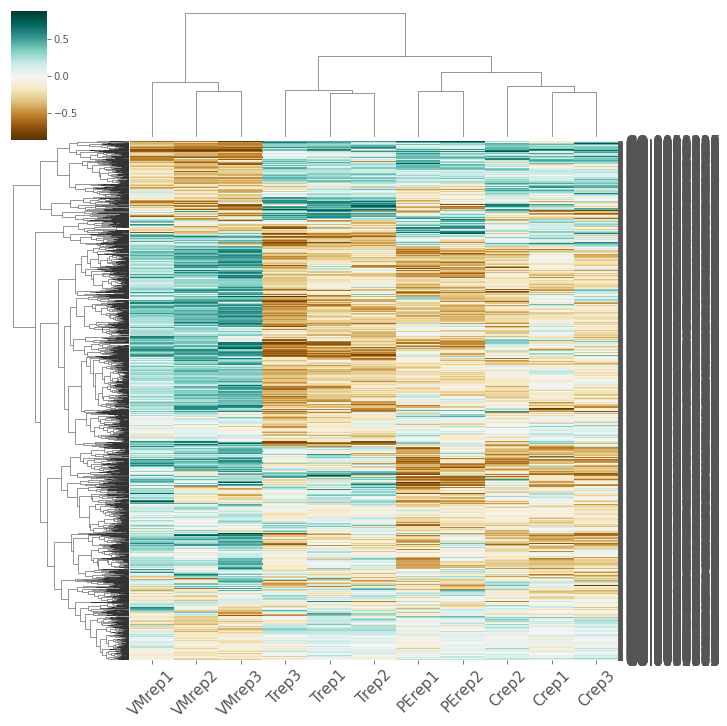

In [8]:
plt.figure()



# Perform clustering and plotting by TM normalized values 
cg = sns.clustermap(common_gvsa, 
               cmap='BrBG',
               method='complete',
               yticklabels=True)



# Setting legend handles and plotting legend
from matplotlib.patches import Patch

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='x', which='major', labelsize=15, rotation=45)

handles_sample = [Patch(facecolor=lut[name]) for name in lut]

plt.show()



# Significantly enriched categories COMMON in both experiments

In [129]:
indx_enr_S = Stress_enr[Stress_enr['p.adjust']<0.05]['ID']
indx_enr_H = HDAC_enr[HDAC_enr['p.adjust']<0.05]['ID']

bool_filter_list=[]
for b1,b2 in zip(gsva_res.index.isin(indx_enr_S),gsva_res.index.isin(indx_enr_H)):
    bool_filter_list.append(all([b1,b2]))
    

common_gvsa_sign = gsva_res[bool_filter_list]


In [36]:
go_terms.rename(columns={go_terms.columns[0]:"ID"}, inplace=True)

In [38]:
common_gvsa_sign = common_gvsa_sign.reset_index()

In [40]:
common_gvsa_sign.head()

,ID,Crep1,Crep2,Crep3,Trep1,Trep2,Trep3,PErep1,PErep2,VMrep1,VMrep2,VMrep3
0,GO:0000028,-0.373291,-0.402258,-0.326137,-0.109640,0.142675,-0.136879,-0.497974,-0.437181,0.217628,0.409461,0.592238
1,GO:0000070,0.020645,-0.203004,-0.206901,-0.340984,-0.365634,-0.417886,-0.074231,-0.402511,0.339791,0.461398,0.460580
2,GO:0000154,0.003298,-0.092952,0.121995,-0.284396,-0.235585,-0.251659,-0.109666,-0.295036,-0.006776,0.241884,0.461260
3,GO:0000226,0.114498,0.007423,0.052292,-0.139084,-0.055994,-0.345850,-0.062668,-0.273458,0.054402,0.106673,0.112342
4,GO:0000272,0.326681,0.260917,0.279045,0.205131,0.177331,0.206560,0.288670,0.227172,-0.126314,-0.326284,-0.384130


In [177]:
lut = dict(zip(["Proembryos", "Proembryo with HDACi", "Vacuolated Microspores"], ["grey",'b','brown']))
lut
sample_order = ["Proembryos", "Proembryos", "Proembryos", "Proembryo with HDACi", "Proembryo with HDACi", "Proembryo with HDACi", "Proembryos","Proembryos", "Vacuolated Microspores", "Vacuolated Microspores", "Vacuolated Microspores"]
col_colors = [*map(lut.get, sample_order)]

In [47]:
order = ["Crep1","Crep2","Crep3","PErep1","PErep2","Trep1","Trep2","Trep3","VMrep1","VMrep2","VMrep3"]
common_gvsa_sign[order].corr().style.background_gradient(cmap ='BrBG_r')

,Crep1,Crep2,Crep3,PErep1,PErep2,Trep1,Trep2,Trep3,VMrep1,VMrep2,VMrep3
Crep1,1.000000,0.847133,0.835911,0.726206,0.395249,0.003816,-0.081324,-0.119257,-0.498688,-0.454383,-0.658947
Crep2,0.847133,1.000000,0.858708,0.725103,0.580757,0.321385,0.259232,0.184907,-0.686780,-0.729899,-0.821261
Crep3,0.835911,0.858708,1.000000,0.770919,0.590907,0.319679,0.241124,0.182599,-0.735107,-0.706080,-0.809543
PErep1,0.726206,0.725103,0.770919,1.000000,0.747179,0.258819,0.125557,0.170473,-0.719207,-0.615044,-0.748882
PErep2,0.395249,0.580757,0.590907,0.747179,1.000000,0.545335,0.417370,0.474789,-0.755500,-0.746651,-0.735688
Trep1,0.003816,0.321385,0.319679,0.258819,0.545335,1.000000,0.906425,0.913880,-0.616592,-0.795514,-0.638365
Trep2,-0.081324,0.259232,0.241124,0.125557,0.417370,0.906425,1.000000,0.899469,-0.579816,-0.757886,-0.525151
Trep3,-0.119257,0.184907,0.182599,0.170473,0.474789,0.913880,0.899469,1.000000,-0.533946,-0.678702,-0.527748
VMrep1,-0.498688,-0.686780,-0.735107,-0.719207,-0.755500,-0.616592,-0.579816,-0.533946,1.000000,0.820878,0.801260
VMrep2,-0.454383,-0.729899,-0.706080,-0.615044,-0.746651,-0.795514,-0.757886,-0.678702,0.820878,1.000000,0.847854


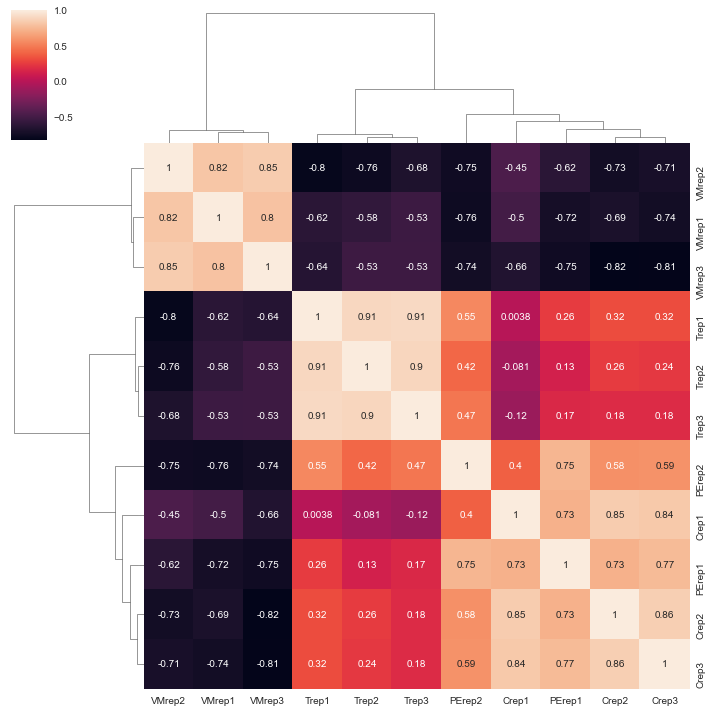

In [235]:
sns.clustermap(common_gvsa_sign[order].corr(),annot=True)

In [279]:
mean_PE_nt = common_gvsa_sign[["Crep1","Crep2","Crep3","PErep1","PErep2"]].mean(axis=1)
mean_PE_t = common_gvsa_sign[["Trep1","Trep2"]].mean(axis=1)
mean_VM = common_gvsa_sign[["VMrep1","VMrep2","VMrep3"]].mean(axis=1)

In [280]:
h = pd.concat((abs(mean_PE_t - mean_PE_nt),abs(mean_PE_t - mean_VM),abs(mean_PE_nt -mean_VM )),axis=1)
#h.style.background_gradient(cmap ='BrBG_r')


In [108]:
type(h)

pandas.core.frame.DataFrame

In [77]:
len(common_gvsa_sign['ID'])

262

In [283]:
h = h.rename(columns={h.columns[0]:"HDACi",h.columns[1]:"ME_noHDACi",h.columns[2]:"ME_HDACi"})
h['ID'] = common_gvsa_sign.index

h.set_index('ID', inplace=True)

In [284]:
h.describe()

,HDACi,ME_noHDACi,ME_HDACi
count,262.000000,262.000000,262.000000
mean,0.230986,0.426596,0.419302
std,0.145167,0.274753,0.244806
min,0.005118,0.000330,0.005941
25%,0.126464,0.177892,0.232127
50%,0.205847,0.436850,0.418147
75%,0.311326,0.621177,0.592434
max,0.803953,1.199322,1.402628


<AxesSubplot:ylabel='Count'>

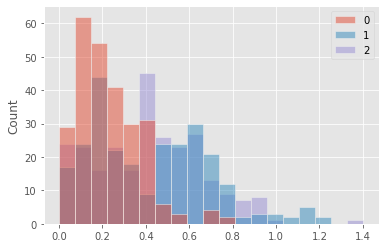

In [81]:
sns.histplot(h)

In [294]:
go_ep_ME_relevant = h[h['ME_HDACi']>h['ME_HDACi'].quantile(0.5)].index
go_ME_relevant = h[h['ME_noHDACi']>h['ME_noHDACi'].quantile(0.5)].index
go_ep_relevant = h[h['HDACi']>h['HDACi'].quantile(0.5)].index

print( "set of categories ME relevant intersecting with HDAC treatment relevant :" , len(set(list((go_ep_ME_relevant & go_ME_relevant) ^go_ep_relevant))))
final_categories = set(list((go_ep_ME_relevant & go_ME_relevant) ^go_ep_relevant))

set of categories ME relevant intersecting with HDAC treatment relevant : 152


In [296]:
final_sign = common_gvsa_sign[common_gvsa_sign.index.isin(final_categories)]
common_gsva_ann = pd.merge(go_terms,final_sign, on="ID", how="inner")
common_gsva_ann = common_gsva_ann[[x for x in common_gsva_ann.columns if x != "ID"]]

<Figure size 576x396 with 0 Axes>

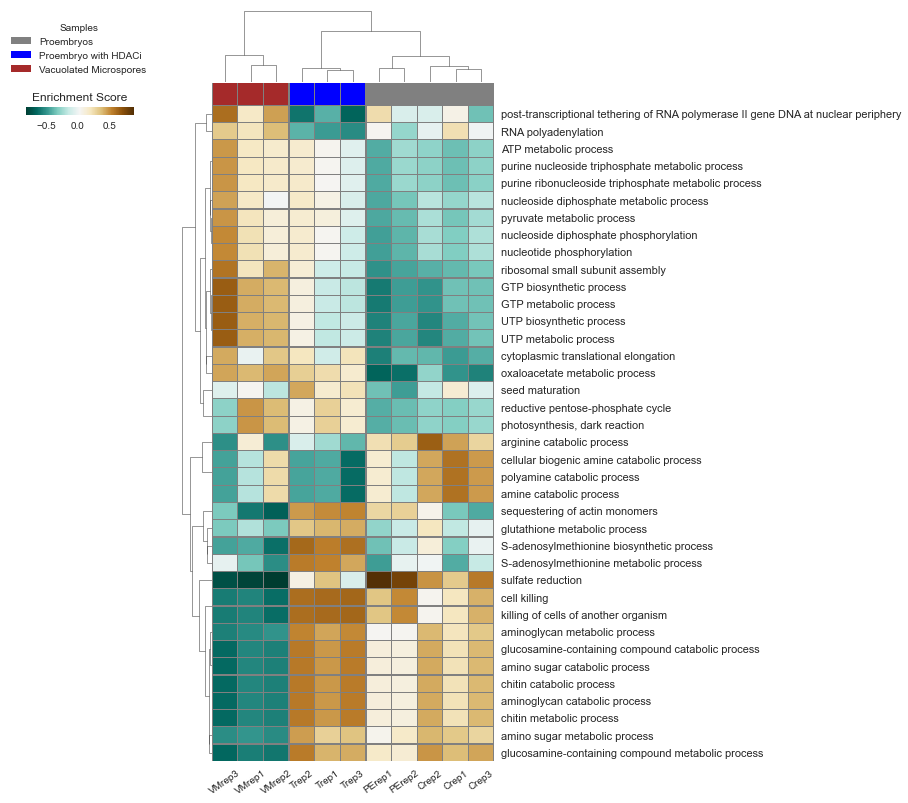

In [293]:
plt.figure()

colorbar_kws = dict(cbar_kws=dict(orientation='horizontal'),linewidths=0.2, linecolor="grey")
#common_gsva_ann.set_index("name", inplace=True)
# Perform clustering and plotting by TM normalized values 
cg = sns.clustermap(common_gsva_ann, 
               cmap='BrBG_r',
               method='complete',
              figsize=(10, 11),
               yticklabels=True,
                dendrogram_ratio=0.1,
                col_colors= col_colors,
                cbar_pos=(-0.2, 0.85, 0.15, 0.01),
                **colorbar_kws)



# Setting legend handles and plotting legend
from matplotlib.patches import Patch

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=10, rotation=35)


handles_sample = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(1.2, 4), loc='lower right')

# # colorbar
# x0, _y0, _w, _h = cg.cbar_pos
# cg.ax_cbar.set_position([0, 0.7, cg.ax_row_dendrogram.get_position().width+0.02, 0.01])
cg.ax_cbar.set_title('Enrichment Score')
# cg.ax_cbar.tick_params(axis='x', length=10)
# for spine in cg.ax_cbar.spines:
#     cg.ax_cbar.spines[spine].set_color('crimson')
#     cg.ax_cbar.spines[spine].set_linewidth(2)
plt.savefig('C:\\Users\\naata\\Documents\\MASTER\\TFM\\GSVA_significant_50percentiledif.png', dpi=600,bbox_inches='tight')

plt.show()

<Figure size 576x396 with 0 Axes>

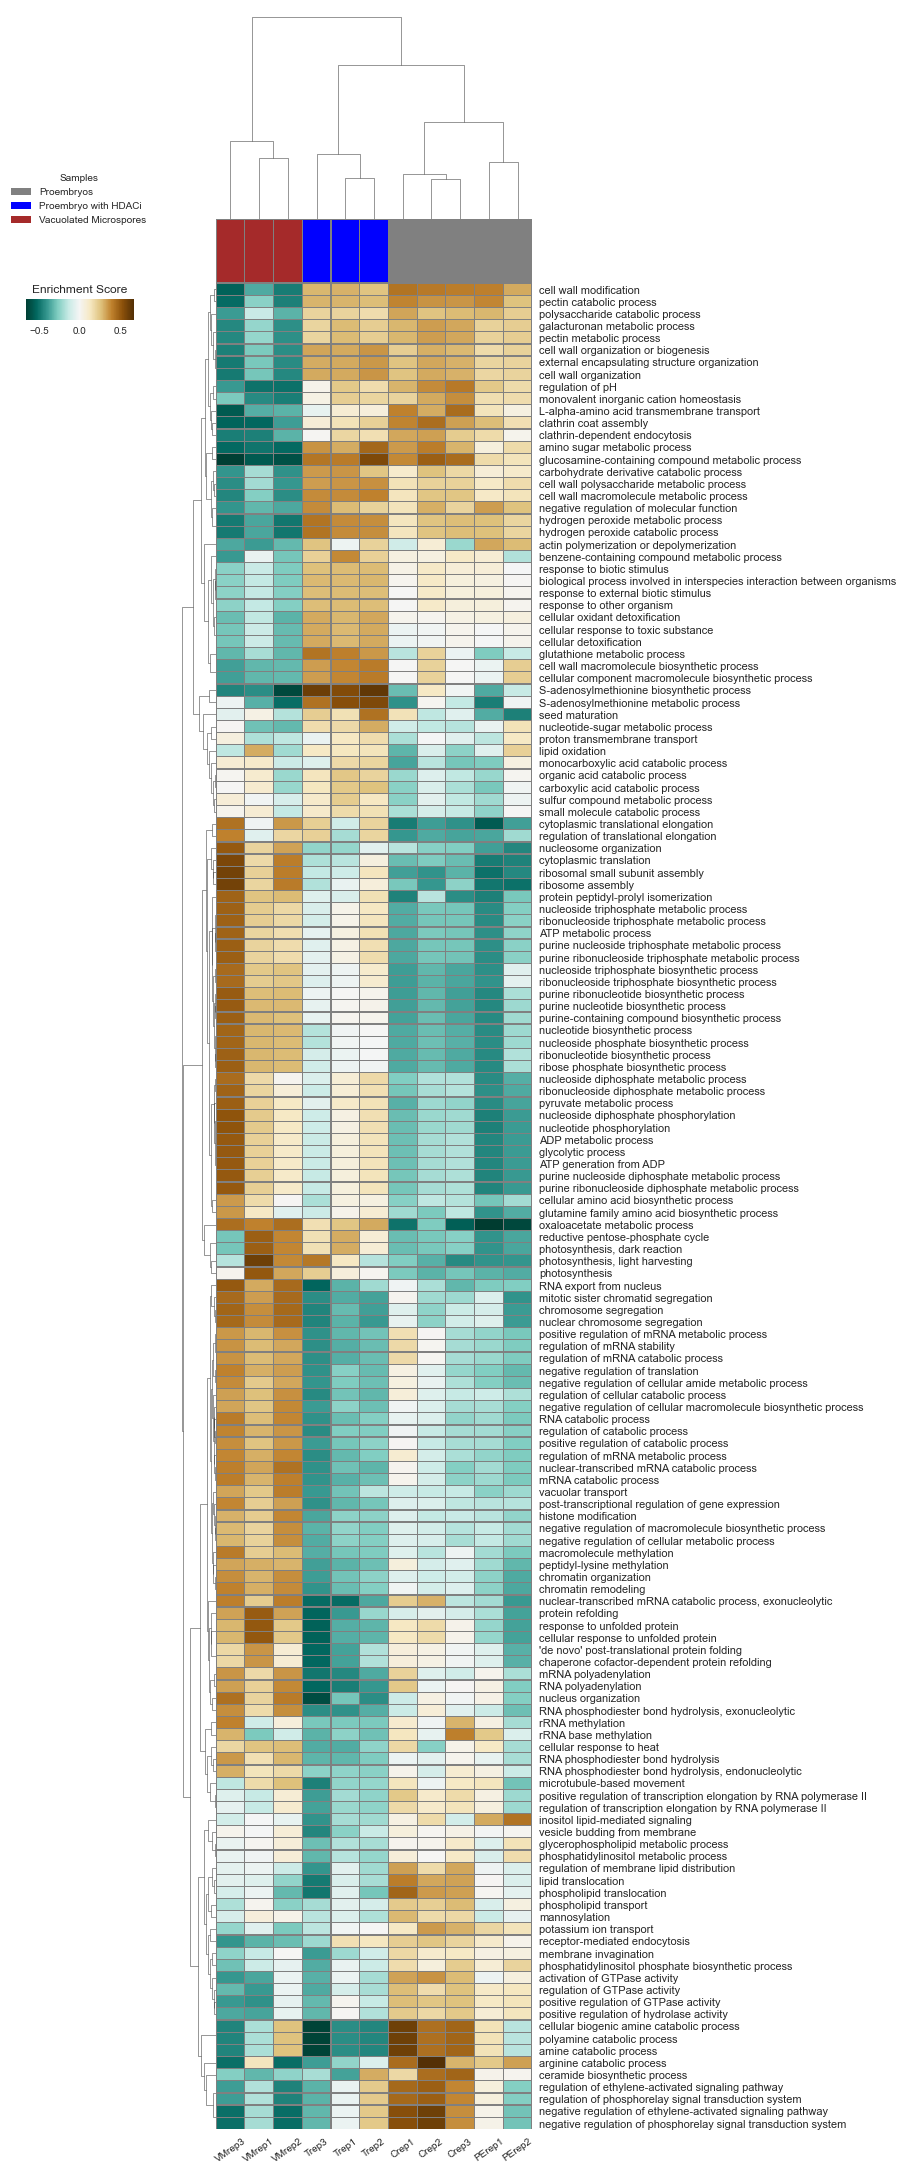

In [298]:
plt.figure()

colorbar_kws = dict(cbar_kws=dict(orientation='horizontal'),linewidths=0.2, linecolor="grey")
common_gsva_ann.set_index("name", inplace=True)
# Perform clustering and plotting by TM normalized values 
cg = sns.clustermap(common_gsva_ann, 
               cmap='BrBG_r',
               method='complete',
              figsize=(10, 30),
               yticklabels=True,
                dendrogram_ratio=0.1,
                col_colors= col_colors,
                cbar_pos=(-0.2, 0.85, 0.15, 0.01),
                **colorbar_kws)



# Setting legend handles and plotting legend
from matplotlib.patches import Patch

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=10, rotation=35)


handles_sample = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(1.2, 4), loc='lower right')

# # colorbar
# x0, _y0, _w, _h = cg.cbar_pos
# cg.ax_cbar.set_position([0, 0.7, cg.ax_row_dendrogram.get_position().width+0.02, 0.01])
cg.ax_cbar.set_title('Enrichment Score')
# cg.ax_cbar.tick_params(axis='x', length=10)
# for spine in cg.ax_cbar.spines:
#     cg.ax_cbar.spines[spine].set_color('crimson')
#     cg.ax_cbar.spines[spine].set_linewidth(2)
plt.savefig('C:\\Users\\naata\\Documents\\MASTER\\TFM\\GSVA_significant_50percentiledif.png', dpi=600,bbox_inches='tight')

plt.show()

treatment vs nontreatment in proembr

<Figure size 432x288 with 0 Axes>

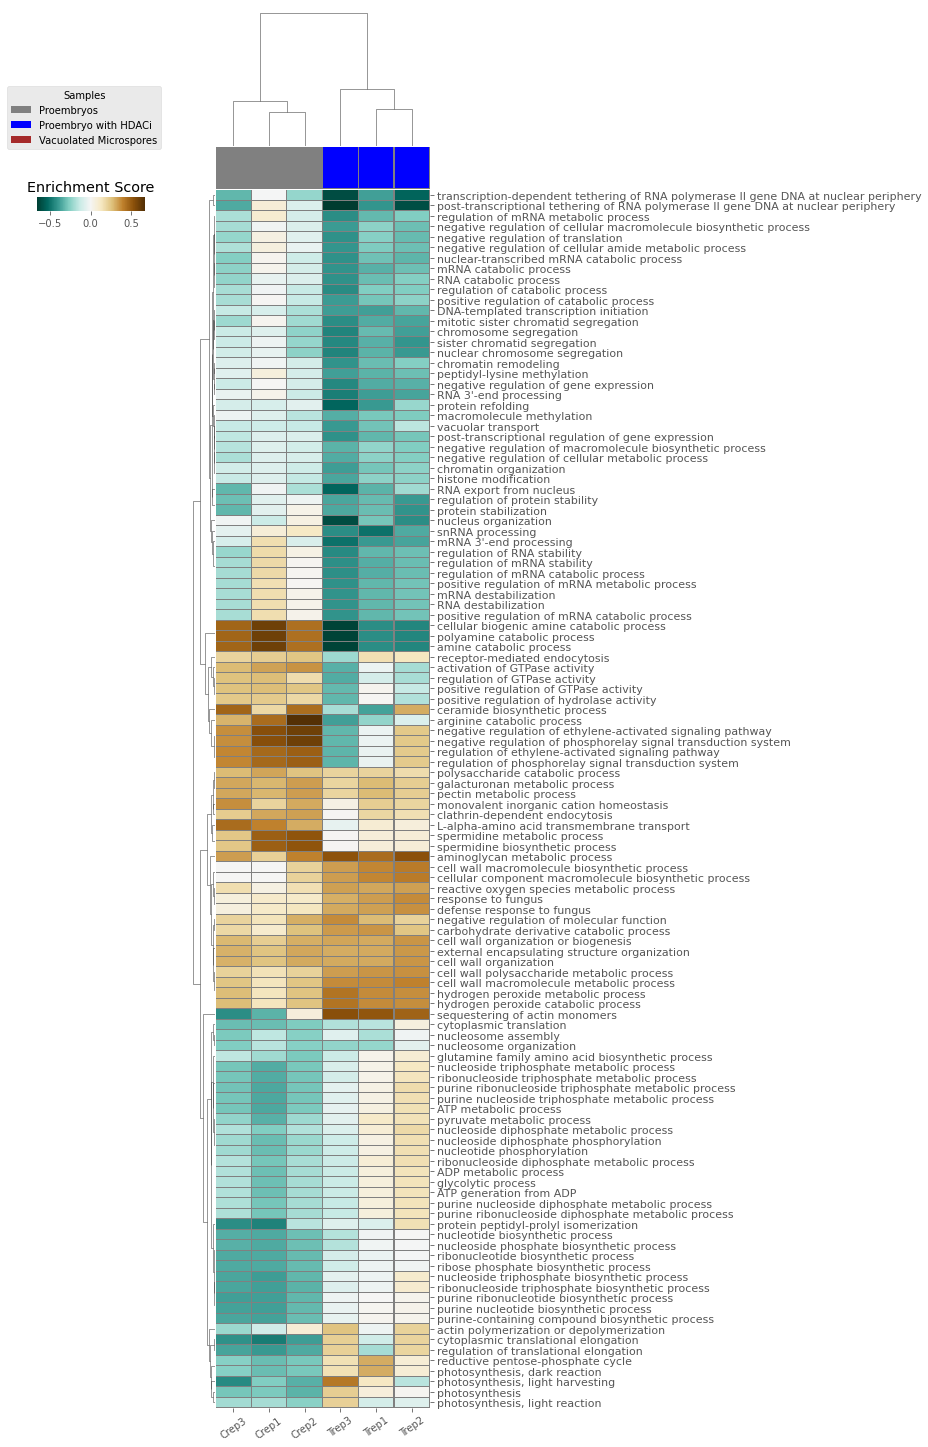

In [190]:
plt.figure()

colorbar_kws = dict(cbar_kws=dict(orientation='horizontal'),linewidths=0.2, linecolor="grey")
#common_gsva_ann.set_index("name", inplace=True)
# Perform clustering and plotting by TM normalized values 
cg = sns.clustermap(common_gsva_ann[["Crep1","Crep2","Crep3","Trep1","Trep2","Trep3"]], 
               cmap='BrBG_r',
               method='complete',
              figsize=(10, 20),
               yticklabels=True,
                dendrogram_ratio=0.1,
                col_colors= col_colors[0:6],
                cbar_pos=(-0.2, 0.85, 0.15, 0.01),
                **colorbar_kws)



# Setting legend handles and plotting legend
from matplotlib.patches import Patch

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=10, rotation=35)


handles_sample = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(1.2, 4), loc='lower right')

# # colorbar
# x0, _y0, _w, _h = cg.cbar_pos
# cg.ax_cbar.set_position([0, 0.7, cg.ax_row_dendrogram.get_position().width+0.02, 0.01])
cg.ax_cbar.set_title('Enrichment Score')
# cg.ax_cbar.tick_params(axis='x', length=10)
# for spine in cg.ax_cbar.spines:
#     cg.ax_cbar.spines[spine].set_color('crimson')
#     cg.ax_cbar.spines[spine].set_linewidth(2)

plt.show()

In [215]:

plt.style.use('seaborn')

100 mas

In [191]:
final_sign = common_gvsa_sign
common_gsva_ann = pd.merge(go_terms,final_sign, on="ID", how="inner")
common_gsva_ann = common_gsva_ann[[x for x in common_gsva_ann.columns if x != "ID"]]

<Figure size 576x396 with 0 Axes>

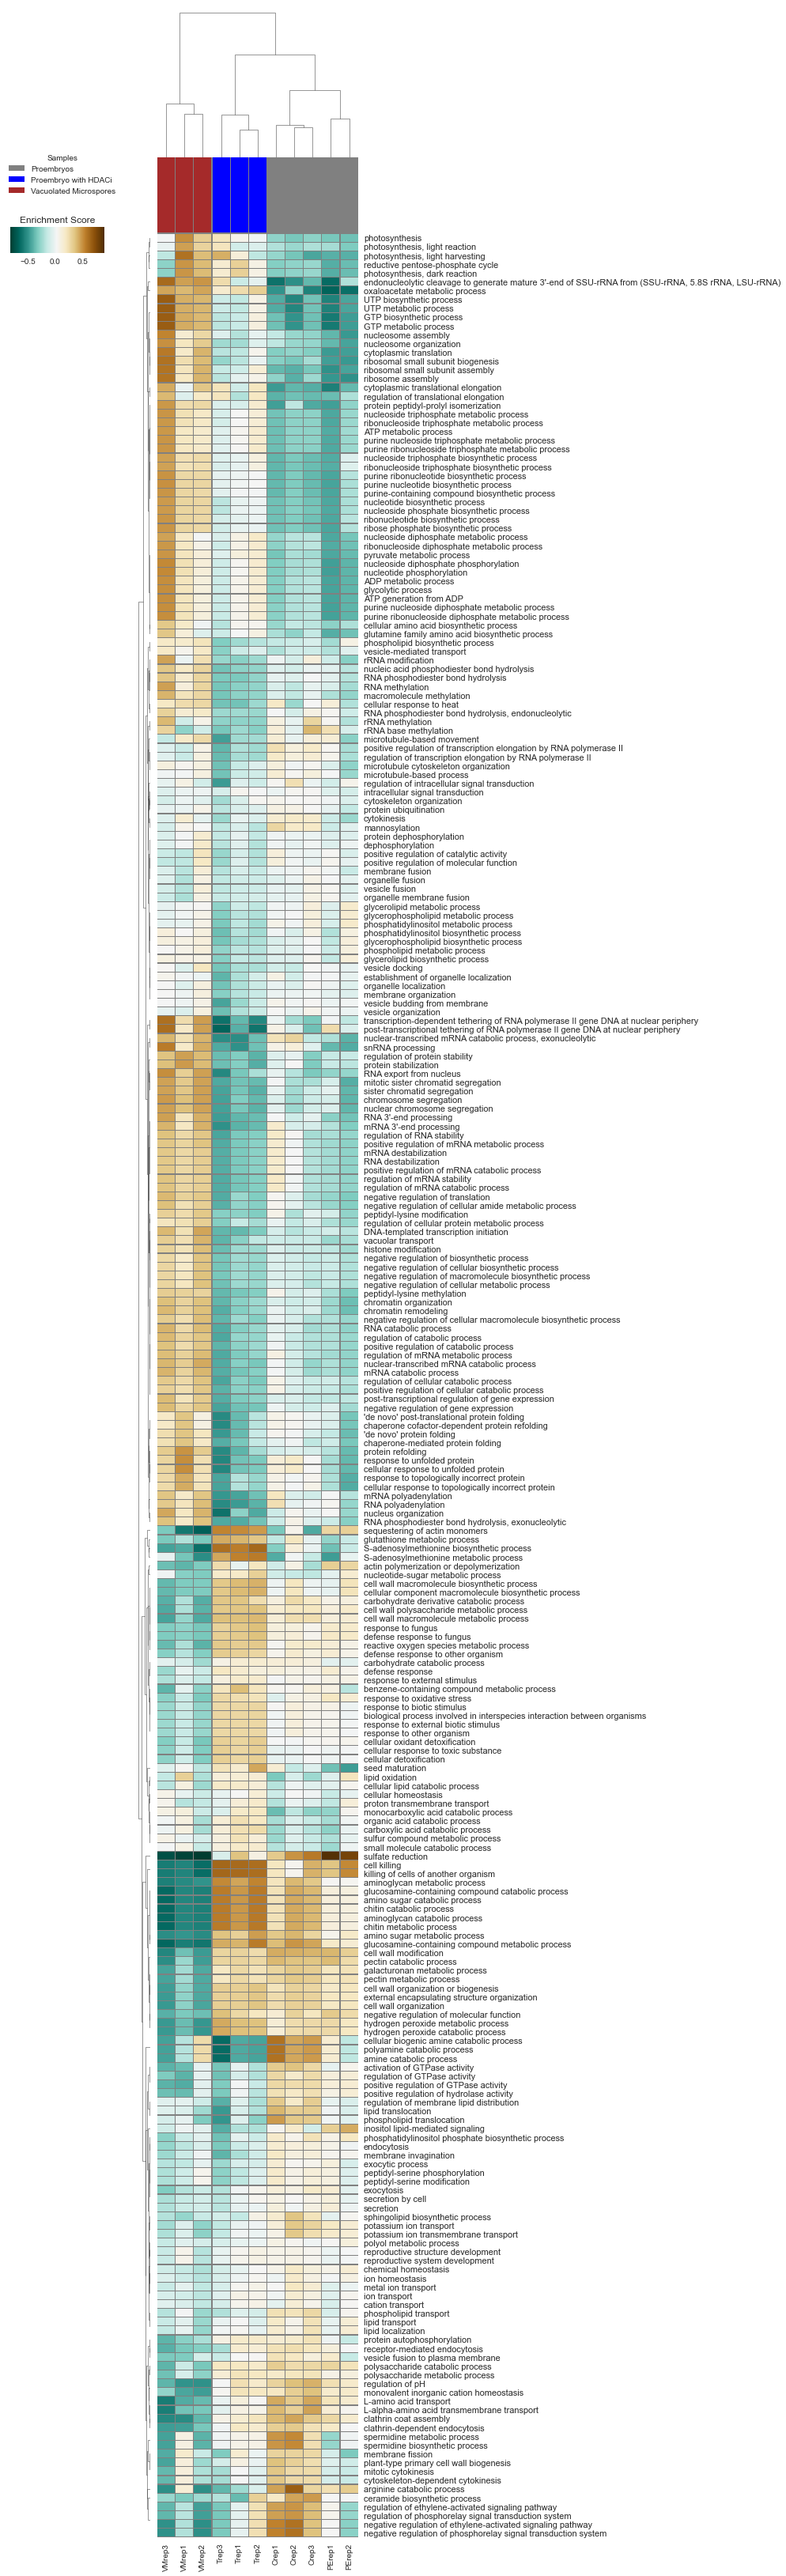

In [220]:
plt.figure()

colorbar_kws = dict(cbar_kws=dict(orientation='horizontal'),linewidths=0.15, linecolor="grey")
#common_gsva_ann.set_index("name", inplace=True)
# Perform clustering and plotting by TM normalized values 
cg = sns.clustermap(common_gsva_ann, 
               cmap='BrBG_r',
               method='complete',
              figsize=(11, 45),
               yticklabels=True,
                dendrogram_ratio=0.06,
                col_colors= col_colors,
                cbar_pos=(-0.2, 0.9, 0.15, 0.01),
                **colorbar_kws)



# Setting legend handles and plotting legend
from matplotlib.patches import Patch

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=10, rotation=90)


handles_sample = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(1.2, 2), loc='lower right')

# # colorbar
# x0, _y0, _w, _h = cg.cbar_pos
# cg.ax_cbar.set_position([0, 0.7, cg.ax_row_dendrogram.get_position().width+0.02, 0.01])
cg.ax_cbar.set_title('Enrichment Score')
# cg.ax_cbar.tick_params(axis='x', length=10)
# for spine in cg.ax_cbar.spines:
#     cg.ax_cbar.spines[spine].set_color('crimson')
#     cg.ax_cbar.spines[spine].set_linewidth(2)
col = cg.ax_row_dendrogram.get_position()
cg.ax_row_dendrogram.set_position([col.x0-0.01, col.y0, col.width, col.height])

plt.savefig('C:\\Users\\naata\\Documents\\MASTER\\TFM\\GSVA_significant_all.png', dpi=600,bbox_inches='tight')

plt.show()

# CHECK COLLAPSE PATHWAYS AND TRY TO PLOT ALL (?) - through ancestors inheriting ES

# NOT COMMON CATEGORIES RELATING TO HDACI?

In [230]:
HDAC_outer_gvsa = gsva_res[bool_filter_list]

In [269]:
bool_filter_list=[]
for b1,b2 in zip(gsva_res.index.isin(indx_enr_S),gsva_res.index.isin(indx_enr_H)):
    if b1 == False and b2 == True:
        bool_filter_list.append(b2)
    else:
        bool_filter_list.append(False)

HDAC_outer_gvsa = gsva_res[bool_filter_list]

In [234]:
HDAC_outer_gvsa.shape

(319, 11)

In [307]:
mean_PE_nt = HDAC_outer_gvsa[["Crep1","Crep2","Crep3","PErep1","PErep2"]].mean(axis=1)
mean_PE_t = HDAC_outer_gvsa[["Trep1","Trep2"]].mean(axis=1)
mean_VM = HDAC_outer_gvsa[["VMrep1","VMrep2","VMrep3"]].mean(axis=1)
h = pd.concat((abs(mean_PE_t - mean_PE_nt),abs(mean_PE_t - mean_VM),abs(mean_PE_nt -mean_VM )),axis=1)
#h.style.background_gradient(cmap ='BrBG_r')

In [301]:
HDAC_outer_gvsa.head()

,Crep1,Crep2,Crep3,Trep1,Trep2,Trep3,PErep1,PErep2,VMrep1,VMrep2,VMrep3
ID,,,,,,,,,,,
GO:0000003,0.032779,0.001757,-0.002091,0.069967,-0.001888,-0.009615,-0.015027,0.014276,0.024059,-0.048192,-0.007225
GO:0000184,0.038205,-0.111914,-0.021624,-0.614687,-0.546929,-0.670269,0.130447,-0.048107,0.514104,0.582780,0.431280
GO:0000244,0.122227,0.081814,-0.189522,-0.484665,-0.357697,-0.633818,0.350409,0.176721,0.376982,0.165013,0.079025
GO:0000278,0.032503,-0.066382,-0.057347,-0.175734,-0.189926,-0.307686,-0.065533,-0.323616,0.234347,0.223854,0.216695
GO:0000375,-0.104514,-0.232971,-0.230550,-0.323774,-0.233588,-0.411657,-0.199542,-0.290791,0.318435,0.431369,0.448531


In [308]:
h = h.rename(columns={h.columns[0]:"HDACi",h.columns[1]:"ME_noHDACi",h.columns[2]:"ME_HDACi"})

go_ep_ME_relevant = h[h['ME_HDACi']>h['ME_HDACi'].quantile(0.5)].index
go_ME_relevant = h[h['ME_noHDACi']>h['ME_noHDACi'].quantile(0.5)].index
go_ep_relevant = h[h['HDACi']>h['HDACi'].quantile(0.5)].index

print( "set of categories ME relevant intersecting with HDAC treatment relevant :" , len(set(list((go_ep_ME_relevant & go_ME_relevant) ^go_ep_relevant))))
final_categories = set(list((go_ep_ME_relevant & go_ME_relevant) ^go_ep_relevant))

set of categories ME relevant intersecting with HDAC treatment relevant : 35


In [309]:
h = h.reset_index()
final_sign = gsva_res[gsva_res.index.isin(final_categories)]
common_gsva_ann = pd.merge(go_terms,final_sign, on="ID", how="inner")
common_gsva_ann = common_gsva_ann[[x for x in common_gsva_ann.columns if x != "ID"]]

<Figure size 576x396 with 0 Axes>

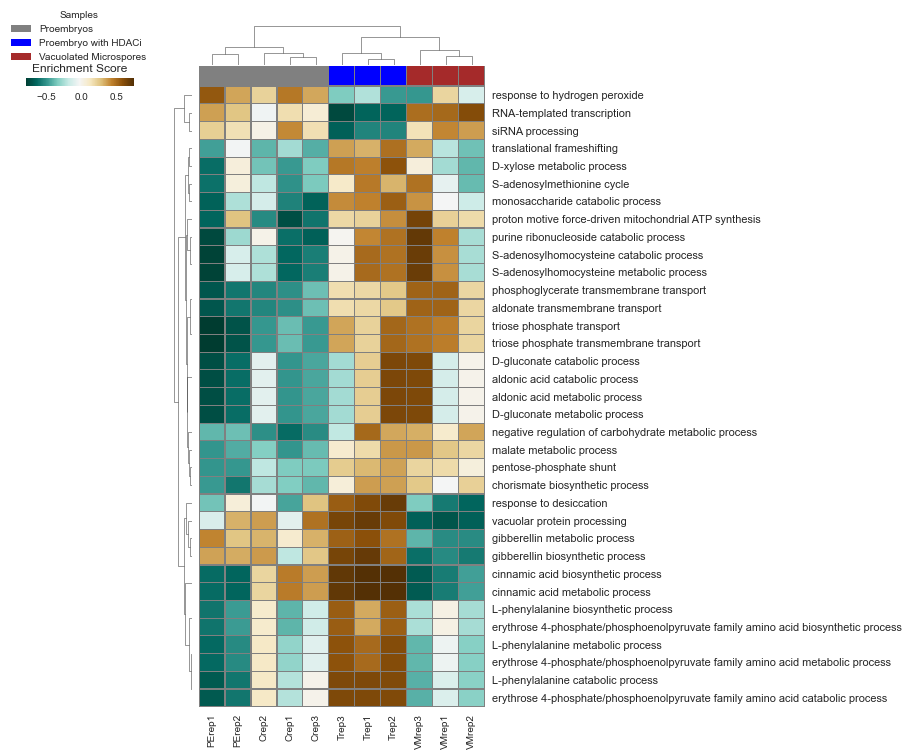

In [311]:
plt.figure()

colorbar_kws = dict(cbar_kws=dict(orientation='horizontal'),linewidths=0.15, linecolor="grey")
common_gsva_ann.set_index("name", inplace=True)
# Perform clustering and plotting by TM normalized values 
cg = sns.clustermap(common_gsva_ann, 
               cmap='BrBG_r',
               method='complete',
             # figsize=(11, 45),
               yticklabels=True,
                dendrogram_ratio=0.06,
                col_colors= col_colors,
                cbar_pos=(-0.2, 0.9, 0.15, 0.01),
                **colorbar_kws)



# Setting legend handles and plotting legend
from matplotlib.patches import Patch

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=10, rotation=90)


handles_sample = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(1.2, 2), loc='lower right')

# # colorbar
# x0, _y0, _w, _h = cg.cbar_pos
# cg.ax_cbar.set_position([0, 0.7, cg.ax_row_dendrogram.get_position().width+0.02, 0.01])
cg.ax_cbar.set_title('Enrichment Score')
# cg.ax_cbar.tick_params(axis='x', length=10)
# for spine in cg.ax_cbar.spines:
#     cg.ax_cbar.spines[spine].set_color('crimson')
#     cg.ax_cbar.spines[spine].set_linewidth(2)
col = cg.ax_row_dendrogram.get_position()
cg.ax_row_dendrogram.set_position([col.x0-0.01, col.y0, col.width, col.height])

#plt.savefig('C:\\Users\\naata\\Documents\\MASTER\\TFM\\GSVA_significant_all.png', dpi=600,bbox_inches='tight')

plt.show()

# LOOKUP CATEGORIES- ENRICHABLE THROUGH DOWNSTREAM ANALYSIS WITH GENEKITR